# Architecture of Classification Neural Network  
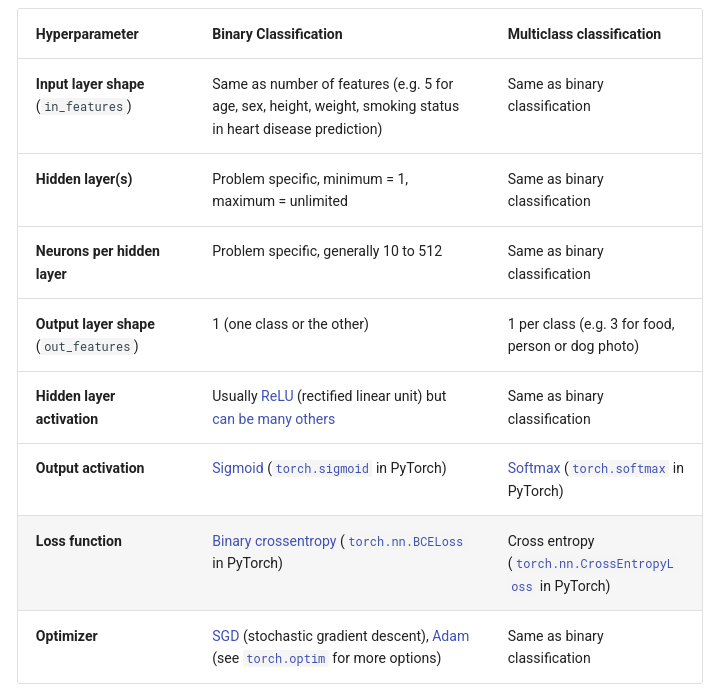

# Make Classification data and get it ready

In [1]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [3]:
import pandas as pd

circles = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
circles.y.value_counts()

y
1    500
0    500
Name: count, dtype: int64

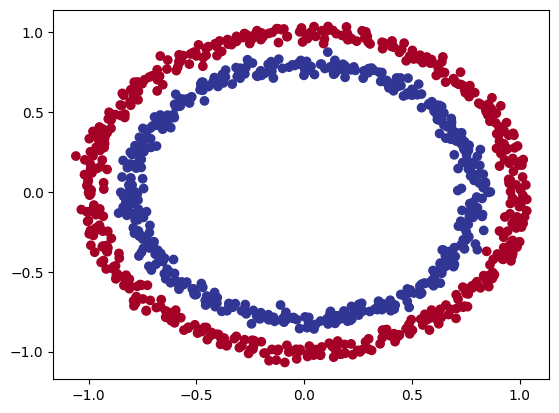

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

### 1. Input and Output Shapes
Always ask **"What shapes are my inputs and what shapes are my outputs?"**

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


**This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).**

### 2. Turn data into tensors and create train and test splits


In [8]:
import torch

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:10], y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

# Building a model
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. **Instantiates the model class and sends it to the target device**
5. **Try predicting on the test set without training the model and compare with the labels of test set** **(IMPORTANT)**


In [11]:
import torch.nn as nn


In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
print(f"Using device: {device}")

Using device: cpu


/home/dhurba/Documents/pytorch/pytorch-venv/lib/python3.10/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [13]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(in_features=2,out_features=5)
        self.linear_layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer2(self.linear_layer1(x))

In [14]:
model_0 = CircleModelV0()
model_0

CircleModelV0(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
model_0 = model_0.to(device=device)

### 1. Visualize the model impact in tensorflow
We can visualize the impact of neural network in the following link.
**[Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.09874&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)**

### 2. `nn.Sequential()` 
- Performs a forward pass computation of the input data through the layers in the order they appear.
- Why not use always?  
    it always runs in sequential order. If you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom `nn.Module` subclass.

In [16]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [17]:
model_0 = model_0.to(device=device)

In [18]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### 3. Predict in test set without training
- **Before training and before inference, always keep the data and model in the same device** **(IMPORTANT)**

In [19]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
untrained_preds[:10]

tensor([[ 0.4030],
        [ 0.4359],
        [ 0.0982],
        [ 0.4903],
        [-0.2485],
        [-0.2257],
        [ 0.1419],
        [-0.0139],
        [ 0.1133],
        [ 0.4343]])

In [20]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

### 4. Setup Loss function and optimizer

PyTorch has two binary cross entropy implementations:

1. `torch.nn.BCELoss()` - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. `torch.nn.BCEWithLogitsLoss()` - This is the same as above except **it has a sigmoid layer (nn.Sigmoid)** built-in (we'll see what this means soon).

Which one should you use?
1. The documentation for `torch.nn.BCEWithLogitsLoss()` states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer.
2. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()`


In [21]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

### 5. Evaluation metics
- If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is.


In [22]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct/len(y_pred)) * 100
    return acc

In [23]:
torch.eq(torch.tensor([[1, 2], [3, 4]]), torch.tensor([[1, 1], [4, 4]]))

tensor([[ True, False],
        [False,  True]])

In [24]:
torch.eq(torch.tensor([[1, 2], [3, 4]]), torch.tensor([[1, 1], [4, 4]])).sum() #total number of Trues

tensor(2)

In [25]:
torch.eq(torch.tensor([[1, 2], [3, 4]]), torch.tensor([[1, 1], [4, 4]])).sum().item() #tensor to scalar

2

# Train model

### 1. Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)
 - **logits** = the raw outputs of our model are often referred to as logits (y = x * W + b)
 - we converted our model's raw outputs (logits) to prediction probabilities using a sigmoid activation function.
 - Then converted the prediction probabilities to prediction labels by rounding them.

In [26]:
# view the first five outcomes of the forward pass on the test data
y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[ 0.4030],
        [ 0.4359],
        [ 0.0982],
        [ 0.4903],
        [-0.2485]], grad_fn=<SliceBackward0>)

In [27]:
Y_pred_probs = torch.sigmoid(y_logits)
Y_pred_probs[:5]

tensor([[0.5994],
        [0.6073],
        [0.5245],
        [0.6202],
        [0.4382]], grad_fn=<SliceBackward0>)

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(Y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_pred_labels

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        1., 1.], grad_fn=<SqueezeBackward0>)

### 2. Building a training and testing loop

In [ ]:
torch.manual_seed(42)

train_loss = []
test_loss = []
train_acc = []
test_acc = []

#no of epochs
epochs = 100

#put the data to the device
X_train, X_test, y_train, y_test =  X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

#training and testing loop
for epoch in range(epochs):

    #train mode
    model_0.train()

    #forward pass
    y_logits = model_0(X_train).squeeze()

    #logits -> probs
    y_pred_probs = torch.sigmoid(y_logits)

    #probs -> labels
    y_pred_labels = torch.round(y_pred_probs)

    #train accuracy
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred_labels)

    #calculate loss
    loss = loss_fn(y_logits, y_train)

    #zero_grad
    optimizer.zero_grad()

    #backprop
    loss.backward()

    #update weights
    optimizer.step()

    #testing
    model_0.eval()

    #context
    with torch.inference_mode():

        #forward pass
        y_logits_test = model_0(X_test).squeeze()

        #logits -> probs
        y_pred_probs_test = torch.sigmoid(y_logits_test)

        #probs -> labels
        y_pred_labels_test = torch.round(y_pred_probs_test)

        #test accuracy
        acc_test = accuracy_fn(y_true=y_test, y_pred=y_pred_labels_test)

        #calculate loss
        loss_test = loss_fn(y_logits_test, y_test)

        if epoch % 10 == 0:
            train_loss.append(loss)
            test_loss.append(loss_test)
            train_acc.append(acc)
            test_acc.append(acc_test)

            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {loss_test:.5f}, Test acc: {acc_test:.2f}%")

            

Epoch: 0 | Loss: 0.70056, Accuracy: 51.38% | Test loss: 0.70741, Test acc: 49.00%
Epoch: 10 | Loss: 0.69826, Accuracy: 51.38% | Test loss: 0.70407, Test acc: 48.00%
Epoch: 20 | Loss: 0.69673, Accuracy: 51.12% | Test loss: 0.70173, Test acc: 49.00%
Epoch: 30 | Loss: 0.69568, Accuracy: 51.25% | Test loss: 0.70005, Test acc: 49.50%
Epoch: 40 | Loss: 0.69494, Accuracy: 50.88% | Test loss: 0.69880, Test acc: 50.50%
Epoch: 50 | Loss: 0.69441, Accuracy: 50.62% | Test loss: 0.69786, Test acc: 50.50%
Epoch: 60 | Loss: 0.69403, Accuracy: 50.50% | Test loss: 0.69714, Test acc: 50.50%
Epoch: 70 | Loss: 0.69376, Accuracy: 50.62% | Test loss: 0.69659, Test acc: 49.50%
Epoch: 80 | Loss: 0.69355, Accuracy: 51.00% | Test loss: 0.69616, Test acc: 48.00%
Epoch: 90 | Loss: 0.69341, Accuracy: 50.88% | Test loss: 0.69583, Test acc: 48.00%


# Make Predictions and evaluate the model
- Plot model's predictions
- download and import the `[helper_functions.py](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)` script from the `[Learn PyTorch for Deep Learning](https://github.com/mrdbourke/pytorch-deep-learning)` repo.

In [35]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


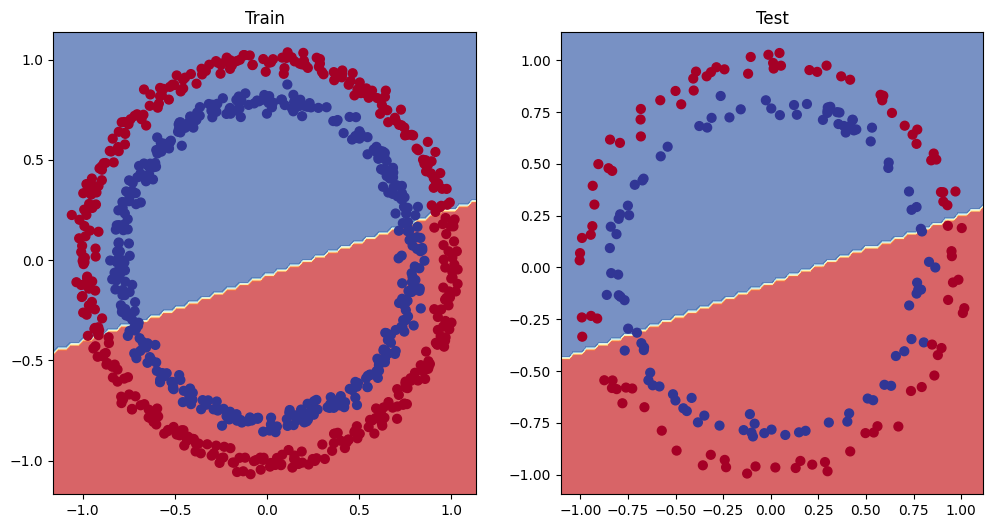

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#### Problems
 - It's currently trying to split the red and blue dots using a straight line...
 - In machine learning terms, our model is underfitting, meaning it's not learning predictive patterns from the data.

# Improving a model (from a model perspective)
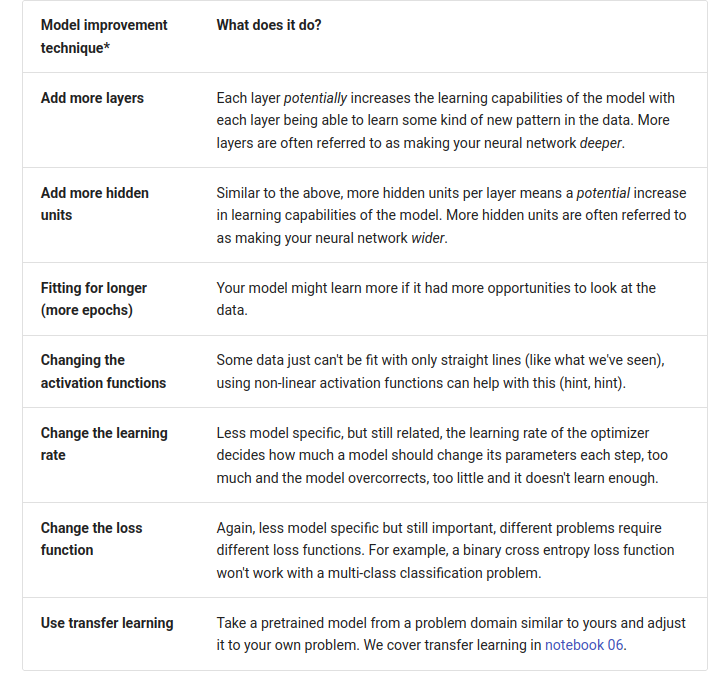  
- And this is also where machine learning's half art half science comes in, there's no real way to know here what the best combination of values is for your project, best to follow the data scientist's motto of "experiment, experiment, experiment".

### 1. Experiment
- fit for longer(epochs = 1000)
- layers more (3)
- hidden units (10)

In [43]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=10)
        self.layer2 = nn.Linear(in_features=10,out_features=10)
        self.layer3 = nn.Linear(in_features=10,out_features=1)

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

In [44]:
model_1 = CircleModelV1()
model_1 = model_1.to(device=device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.1
)

In [46]:
torch.manual_seed(42)

train_loss = []
test_loss = []
train_acc = []
test_acc = []

#no of epochs
epochs = 1000

#put the data to the device
X_train, X_test, y_train, y_test =  X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

#training and testing loop
for epoch in range(epochs):

    #train mode
    model_1.train()

    #forward pass
    y_logits = model_1(X_train).squeeze()

    #logits -> probs
    y_pred_probs = torch.sigmoid(y_logits)

    #probs -> labels
    y_pred_labels = torch.round(y_pred_probs)

    #train accuracy
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred_labels)

    #calculate loss
    loss = loss_fn(y_logits, y_train)

    #zero_grad
    optimizer.zero_grad()

    #backprop
    loss.backward()

    #update weights
    optimizer.step()

    #testing
    model_1.eval()

    #context
    with torch.inference_mode():

        #forward pass
        y_logits_test = model_1(X_test).squeeze()

        #logits -> probs
        y_pred_probs_test = torch.sigmoid(y_logits_test)

        #probs -> labels
        y_pred_labels_test = torch.round(y_pred_probs_test)

        #test accuracy
        acc_test = accuracy_fn(y_true=y_test, y_pred=y_pred_labels_test)

        #calculate loss
        loss_test = loss_fn(y_logits_test, y_test)

        if epoch % 100 == 0:
            train_loss.append(loss)
            test_loss.append(loss_test)
            train_acc.append(acc)
            test_acc.append(acc_test)

            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {loss_test:.5f}, Test acc: {acc_test:.2f}%")

            

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


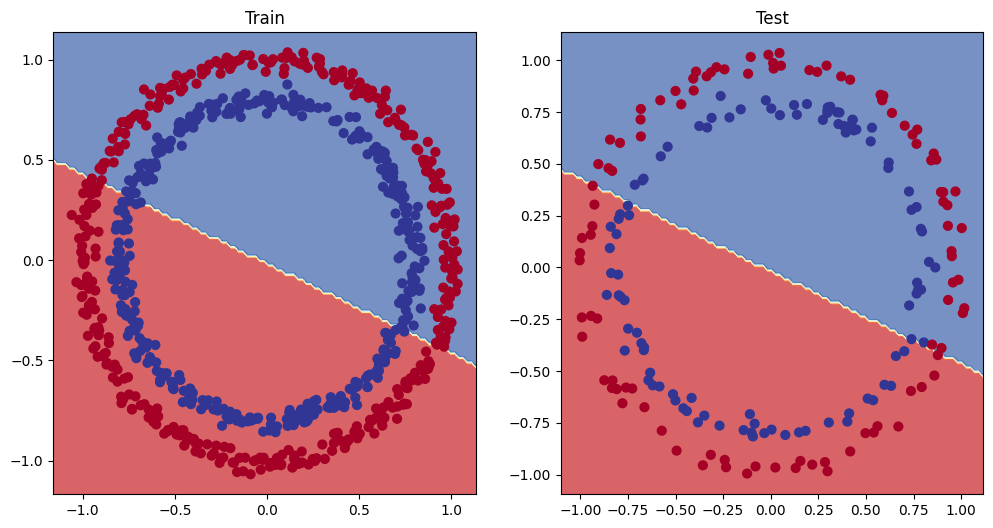

In [47]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)